## Hypothesis Testing
#### Important: Make sure you have the following dataframe in the ram before executing the codes
##### (1) df_10ksp_filtered3 for the approach of BAG OF WORDS
##### (2) df_10ksp_filtered4 for the approach of TF-IDF
##### (3) df_10ksp_filtered5 for the approach of BERT

In [266]:
%store -r df_10ksp_filtered3
%store -r df_10ksp_filtered4
%store -r df_10ksp_filtered5

In [175]:
import pandas as pd
import numpy as np

In [118]:
#in case you need to call these variables by uploading:
#skip this if you already created these variables in jupyter notebook
df_10ksp_filtered3=pd.read_csv('filter3.csv')#if your local save is under other file name, please change
df_10ksp_filtered4=pd.read_csv('filtered4.csv')
df_10ksp_filtered5=pd.read_csv('finbert_df5.csv')

#### ABNORMAL VOLUME

In [153]:
#volume data and control variables
vol_url='https://raw.githubusercontent.com/ethancn01/10ksentimentalanalysis/main/Vol_data.csv'
vol=pd.read_csv(vol_url)
vol.drop(vol.columns[-2], axis=1, inplace=True)
vol['abnormal_vol_mcd']=vol['d4']/vol['base_vol']
vol['abnormal_vol_mcd'].mean()

1.1499918794793276

#### ABNORMAL RETURN

In [176]:
#Abnormal return
ar_url='https://raw.githubusercontent.com/ethancn01/10ksentimentalanalysis/main/Abnormal_return.xlsx'
ar=pd.read_excel(ar_url)

In [178]:
ar.head(3)

,Unnamed: 0,ACCESSION NUMBER,CONFORMED SUBMISSION TYPE,CONFORMED PERIOD OF REPORT,FILED AS OF DATE,DATE AS OF CHANGE,COMPANY CONFORMED NAME,CENTRAL INDEX KEY,ticker,FISCAL YEAR END,CAR(T0),CAR(T1),CAR(T3),CAR(T5),CAR(T10),CAR(T15),CAR(T20),CAR(T30),CAR(T60),alpha
0,0,0000004904-00-000039,10-K405,19991231,20000324,Not found,AMERICAN ELECTRIC POWER COMPANY INC,4904,AEP,1231,0.012700,0.022754,-0.009894,-0.027305,-0.007303,0.023747,0.076834,0.135472,0.146637,0.0002
1,1,0000037996-00-000019,10-K,19991231,20000316,Not found,FORD MOTOR CO,37996,F,1231,-0.081310,-0.066145,-0.076908,-0.125355,-0.083754,-0.030085,0.052572,0.066003,-0.034343,-0.0003
2,2,0000898430-00-003950,10-K,20000930,20001227,Not found,JACOBS ENGINEERING GROUP INC /DE/,52988,J,930,-0.015927,-0.037694,0.006655,0.068483,0.031468,0.122843,0.092758,0.089306,0.022812,-0.0004


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


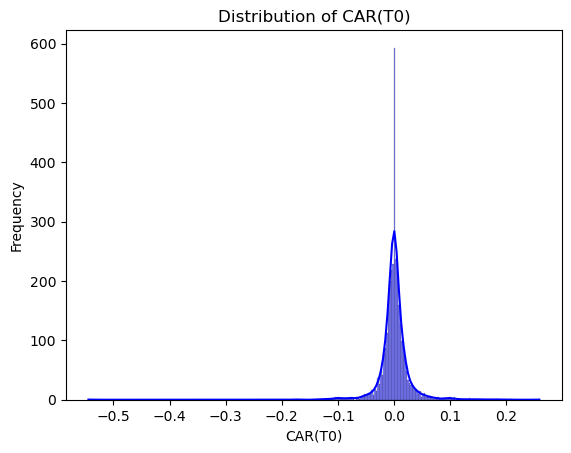

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ar['CAR(T0)'], kde=True, color='blue', bins=300)
plt.title('Distribution of CAR(T0)')
plt.xlabel('CAR(T0)')
plt.ylabel('Frequency')


plt.show()


#### FINANCIAL PERFORMANCE

In [209]:
fin_url='https://raw.githubusercontent.com/ethancn01/10ksentimentalanalysis/main/financials.csv'
fin=pd.read_csv(fin_url)

## 1. BAG OF WORDS

In [180]:
df_10ksp_filtered3['neg_proportion']=df_10ksp_filtered3['Negative']/df_10ksp_filtered3['Total Word Count']

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


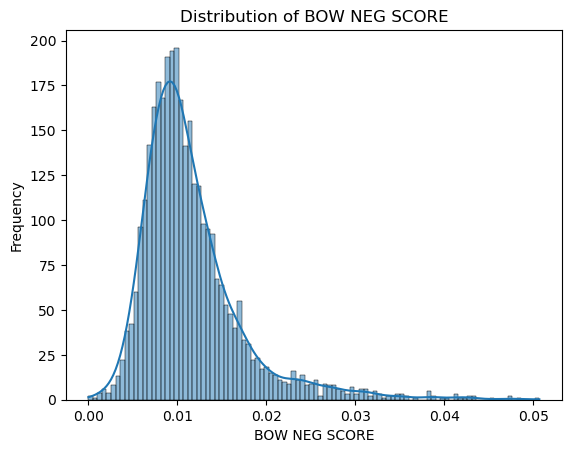

In [181]:
# The distribution of BOW Negative Scores
df_10ksp_filtered3.head(3)
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_10ksp_filtered3, x='neg_proportion', bins=100, kde=True)
plt.title('Distribution of BOW NEG SCORE')
plt.xlabel('BOW NEG SCORE')
plt.ylabel('Frequency')
plt.show()

#### 1.1 BOW VS ABNORMAL VOLUME

In [191]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

merged_df = pd.merge(df_10ksp_filtered3, vol, on='ACCESSION NUMBER')
merged_df = merged_df.dropna(subset=['abnormal_vol_mcd'])
# merged_df = merged_df[merged_df['abnormal_vol_mcd']>=1]

merged_df['PB_ratios'] = pd.to_numeric(merged_df['PB_ratios'], errors='coerce')
merged_df['PB_ratios'].fillna(merged_df['PB_ratios'].mean(), inplace=True)

merged_df['mkt_cap'] = pd.to_numeric(merged_df['mkt_cap'], errors='coerce')
merged_df['mkt_cap'].fillna(merged_df['mkt_cap'].mean(), inplace=True)


from sklearn.preprocessing import StandardScaler
import pandas as pd
import statsmodels.api as sm


X = merged_df[['Negative','Positive','Total Word Count', 'mkt_cap', 'PB_ratios']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merged_df['abnormal_vol_mcd']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       abnormal_vol_mcd   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.296
Date:                Sun, 25 Feb 2024   Prob (F-statistic):              0.263
Time:                        22:40:19   Log-Likelihood:                -2862.7
No. Observations:                3063   AIC:                             5737.
Df Residuals:                    3057   BIC:                             5774.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1500      0.011    103.201      0.0

#### 1.2 BOW VS ABNORMAL RETURN

In [192]:
#merge the abnormal return
merged_df = pd.merge(merged_df, ar[['ACCESSION NUMBER', 'CAR(T0)', 'CAR(T1)', 'CAR(T3)', 'CAR(T5)', 'CAR(T10)', 'CAR(T15)', 'CAR(T20)', 'CAR(T30)', 'CAR(T60)','alpha']], on='ACCESSION NUMBER', how='left')
merged_df=merged_df.dropna(subset=['alpha'])

In [193]:
X = merged_df[['Negative','Positive','Total Word Count','mkt_cap', 'PB_ratios','alpha']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merged_df['CAR(T0)']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                CAR(T0)   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.272
Date:                Sun, 25 Feb 2024   Prob (F-statistic):              0.267
Time:                        22:40:29   Log-Likelihood:                 6572.9
No. Observations:                3096   AIC:                        -1.313e+04
Df Residuals:                    3089   BIC:                        -1.309e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      1.083      0.2

In [194]:
# test respectively for the data before and after 2010
df_pre_2011 = merged_df[merged_df['FILE YEAR'] <= 2010]

df_post_2010 = merged_df[merged_df['FILE YEAR'] >= 2011]
def run_ols_regression(df):
    X = df[['Negative','Positive','Total Word Count','mkt_cap', 'PB_ratios','alpha']]
    Y = df['CAR(T0)']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_with_const = sm.add_constant(X_scaled)
    model = sm.OLS(Y, X_scaled_with_const).fit()
    print(model.summary())
print("Regression for data up to and including 2010:")
run_ols_regression(df_pre_2011)

print("\nRegression for data from 2011 onwards:")
run_ols_regression(df_post_2010)


Regression for data up to and including 2010:
                            OLS Regression Results                            
Dep. Variable:                CAR(T0)   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6442
Date:                Sun, 25 Feb 2024   Prob (F-statistic):              0.695
Time:                        22:41:21   Log-Likelihood:                 1511.4
No. Observations:                 769   AIC:                            -3009.
Df Residuals:                     762   BIC:                            -2976.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

#### 1.3 BOW VS REVENUE GROWTH (Y, Y+1); BOW VS ROE CHANGE (Y,Y+1); CONTROL VARIABLES: TOTAL ASSETS,CURRENT ROE,REVENUE

In [212]:
#merge the financials
merged_df = pd.merge(merged_df, fin[['ACCESSION NUMBER', 'CURRENT REVENUE YOY', 'NEXT REVENUE YOY', 'ROE Y0 YOY', 'ROE Y1 YOY', 'ASSET', 'REVENUE', 'ROE']], on='ACCESSION NUMBER', how='left')


In [219]:
merged_df = merged_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['CURRENT REVENUE YOY', 'NEXT REVENUE YOY', 'ROE Y0 YOY', 'ROE Y1 YOY', 'ASSET', 'REVENUE', 'ROE'])

##### 1.3.1 SENTIMENT VS CURRENT YEAR REVENUE GROWTH

In [220]:
X = merged_df[['Negative','Positive','Total Word Count','ASSET', 'REVENUE','ROE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merged_df['CURRENT REVENUE YOY']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CURRENT REVENUE YOY   R-squared:                       0.006
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     2.626
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):             0.0153
Time:                         09:55:02   Log-Likelihood:                -3552.5
No. Observations:                 2814   AIC:                             7119.
Df Residuals:                     2807   BIC:                             7161.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2132      0.016     13.20

##### 1.3.2 SENTIMENT VS FOLLOWING YEAR REVENUE GROWTH

In [227]:
X = merged_df[['Negative','Positive','Total Word Count','ASSET', 'REVENUE','ROE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merged_df['NEXT REVENUE YOY']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       NEXT REVENUE YOY   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.071
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           3.47e-05
Time:                        09:58:00   Log-Likelihood:                -3421.7
No. Observations:                2814   AIC:                             6857.
Df Residuals:                    2807   BIC:                             6899.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1594      0.015     10.345      0.0

##### 1.3.3 SENTIMENT VS CURRENT YEAR ROE CHANGE

In [228]:
X = merged_df[['Negative','Positive','Total Word Count','ASSET', 'REVENUE','ROE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merged_df['ROE Y0 YOY']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ROE Y0 YOY   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     275.4
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          1.02e-277
Time:                        10:00:26   Log-Likelihood:                 394.17
No. Observations:                2814   AIC:                            -774.3
Df Residuals:                    2807   BIC:                            -732.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      0.004      4.685      0.0

#### 1.3.4 SENTIMENT VS FOLLOWING YEAR ROE CHANGE

In [230]:
X = merged_df[['Negative','Positive','Total Word Count','ASSET', 'REVENUE','ROE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merged_df['ROE Y1 YOY']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ROE Y1 YOY   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.506
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           7.85e-07
Time:                        10:01:30   Log-Likelihood:                -147.43
No. Observations:                2814   AIC:                             308.9
Df Residuals:                    2807   BIC:                             350.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0130      0.005      2.695      0.0

## 2. TF-IDF

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


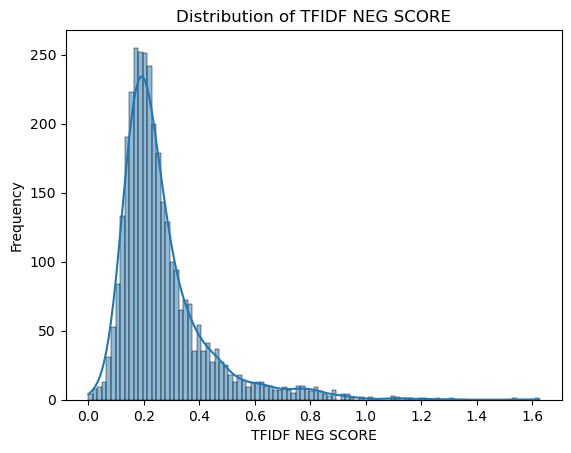

In [195]:
# The distribution of TF-IDF negative scores
sns.histplot(data=df_10ksp_filtered4, x='Negative_tf', bins=100, kde=True)
plt.title('Distribution of TFIDF NEG SCORE')
plt.xlabel('TFIDF NEG SCORE')
plt.ylabel('Frequency')
plt.show()

#### 2.1 TFIDF VS ABNORMAL VOLUME

In [252]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


merge_tf = pd.merge(df_10ksp_filtered4, vol, on='ACCESSION NUMBER')
merge_tf = merge_tf.dropna(subset=['abnormal_vol_mcd'])
# merge_tf = merge_tf[merge_tf['abnormal_vol_mcd'] >= 1]


merge_tf['PB_ratios'] = pd.to_numeric(merge_tf['PB_ratios'], errors='coerce')
merge_tf['PB_ratios'].fillna(merge_tf['PB_ratios'].mean(), inplace=True)

merge_tf['mkt_cap'] = pd.to_numeric(merge_tf['mkt_cap'], errors='coerce')
merge_tf['mkt_cap'].fillna(merge_tf['mkt_cap'].mean(), inplace=True)

X = merge_tf[['Negative_tf', 'Positive_tf', 'mkt_cap', 'PB_ratios']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)


Y = merge_tf['abnormal_vol_mcd']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:       abnormal_vol_mcd   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.172
Date:                Mon, 26 Feb 2024   Prob (F-statistic):              0.321
Time:                        10:16:01   Log-Likelihood:                -2863.6
No. Observations:                3063   AIC:                             5737.
Df Residuals:                    3058   BIC:                             5767.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1500      0.011    103.187      0.0

#### 2.2 TFIDF VS ABNORMAL RETURN

In [253]:
merge_tf = pd.merge(merge_tf, ar[['ACCESSION NUMBER', 'CAR(T0)', 'CAR(T1)', 'CAR(T3)', 'CAR(T5)', 'CAR(T10)', 'CAR(T15)', 'CAR(T20)', 'CAR(T30)', 'CAR(T60)','alpha']], on='ACCESSION NUMBER', how='left')

In [254]:
merge_tf = merge_tf.replace([np.inf, -np.inf], np.nan)
merge_tf = merge_tf.dropna(subset=['Negative_tf', 'Positive_tf', 'mkt_cap', 'PB_ratios', 'alpha', 'CAR(T0)']) 

In [256]:
X = merge_tf[['Negative_tf','Positive_tf','mkt_cap', 'PB_ratios','alpha']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merge_tf['CAR(T0)']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                CAR(T0)   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.164
Date:                Mon, 26 Feb 2024   Prob (F-statistic):              0.325
Time:                        10:17:19   Log-Likelihood:                 6572.0
No. Observations:                3096   AIC:                        -1.313e+04
Df Residuals:                    3090   BIC:                        -1.310e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      1.083      0.2

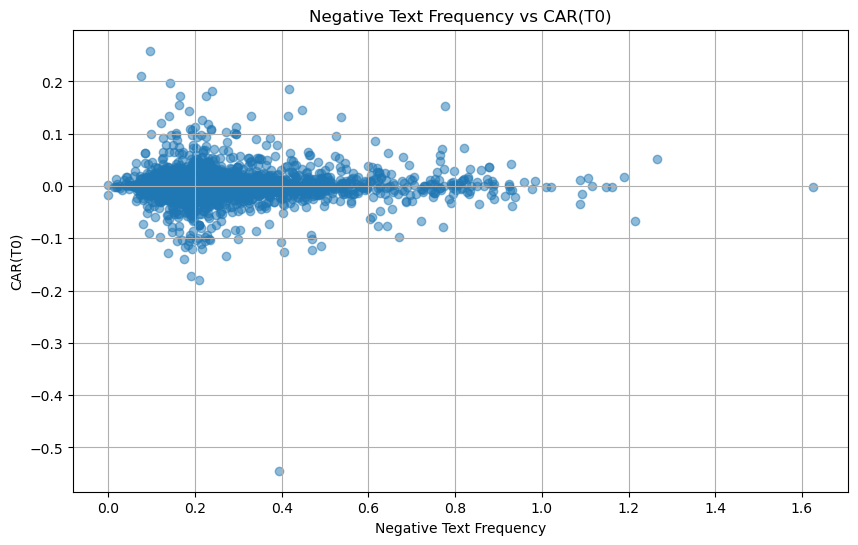

In [257]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(merge_tf['Negative_tf'], merge_tf['CAR(T0)'], alpha=0.5)
plt.title('Negative Text Frequency vs CAR(T0)')
plt.xlabel('Negative Text Frequency')
plt.ylabel('CAR(T0)')
plt.grid(True)
plt.show()


#### 2.3 TF IDF SENTIMENT VS FINANCIALS

In [258]:
merge_tf = pd.merge(merge_tf, fin[['ACCESSION NUMBER', 'CURRENT REVENUE YOY', 'NEXT REVENUE YOY', 'ROE Y0 YOY', 'ROE Y1 YOY', 'ASSET', 'REVENUE', 'ROE']], on='ACCESSION NUMBER', how='left')
merge_tf = merge_tf.replace([np.inf, -np.inf], np.nan).dropna(subset=['CURRENT REVENUE YOY', 'NEXT REVENUE YOY', 'ROE Y0 YOY', 'ROE Y1 YOY', 'ASSET', 'REVENUE', 'ROE'])

In [260]:
X = merge_tf[['Negative_tf','Positive_tf','ASSET', 'REVENUE','ROE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merge_tf['CURRENT REVENUE YOY']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CURRENT REVENUE YOY   R-squared:                       0.008
Model:                             OLS   Adj. R-squared:                  0.006
Method:                  Least Squares   F-statistic:                     4.306
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):           0.000663
Time:                         10:18:58   Log-Likelihood:                -3549.7
No. Observations:                 2814   AIC:                             7111.
Df Residuals:                     2808   BIC:                             7147.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2132      0.016     13.22

#### 2.3.2 TFIDF VS FOLLOWING YEAR GROWTH

In [261]:
X = merge_tf[['Negative_tf','Positive_tf','ASSET', 'REVENUE','ROE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merge_tf['NEXT REVENUE YOY']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       NEXT REVENUE YOY   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     9.261
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           9.30e-09
Time:                        10:19:57   Log-Likelihood:                -3413.8
No. Observations:                2814   AIC:                             6840.
Df Residuals:                    2808   BIC:                             6875.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1594      0.015     10.376      0.0

#### 2.3.3 TFIDF VS CURRENT YEAR ROE

In [264]:
X = merge_tf[['Negative_tf','Positive_tf','ASSET', 'REVENUE','ROE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merge_tf['ROE Y0 YOY']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ROE Y0 YOY   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     329.6
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          2.24e-278
Time:                        10:24:10   Log-Likelihood:                 392.73
No. Observations:                2814   AIC:                            -773.5
Df Residuals:                    2808   BIC:                            -737.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      0.004      4.683      0.0

#### 2.3.4 TFIDF VS FOLLOWING YEAR ROE


In [265]:
X = merge_tf[['Negative_tf','Positive_tf','ASSET', 'REVENUE','ROE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merge_tf['ROE Y1 YOY']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ROE Y1 YOY   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.448
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           6.04e-08
Time:                        10:25:10   Log-Likelihood:                -145.85
No. Observations:                2814   AIC:                             303.7
Df Residuals:                    2808   BIC:                             339.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0130      0.005      2.697      0.0

## 3. FINBERT

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


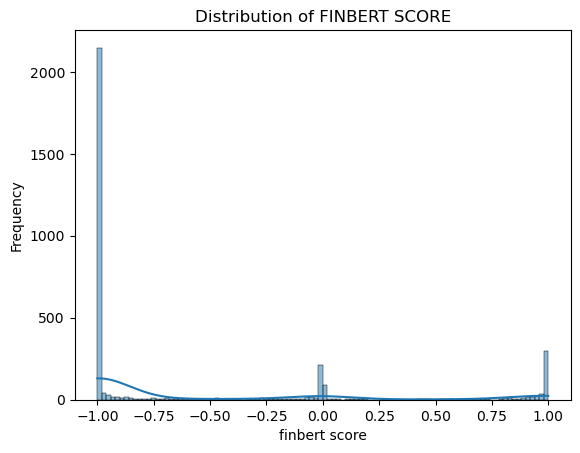

In [199]:
# The distribution of FINBERT  scores
sns.histplot(data=df_10ksp_filtered5, x='FINBERT SCORE', bins=100, kde=True)
plt.title('Distribution of FINBERT SCORE')
plt.xlabel('finbert score')
plt.ylabel('Frequency')
plt.show()

#### 3.1 FINBERT VS ABNORMAL VOLUME

In [207]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm


merged_df2 = pd.merge(df_10ksp_filtered5, vol, on='ACCESSION NUMBER')
merged_df2 = merged_df2.dropna(subset=['abnormal_vol_mcd'])


merged_df2['PB_ratios'] = pd.to_numeric(merged_df2['PB_ratios'], errors='coerce')
merged_df2['PB_ratios'].fillna(merged_df2['PB_ratios'].mean(), inplace=True)


merged_df2['mkt_cap'] = pd.to_numeric(merged_df2['mkt_cap'], errors='coerce')
merged_df2['mkt_cap'].fillna(merged_df2['mkt_cap'].mean(), inplace=True)


merged_df2['abnormal_vol_mcd'] = pd.to_numeric(merged_df2['abnormal_vol_mcd'], errors='coerce')


X = merged_df2[['FINBERT SCORE', 'mkt_cap', 'PB_ratios']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled_with_const = sm.add_constant(X_scaled)


Y = merged_df2['abnormal_vol_mcd']


model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       abnormal_vol_mcd   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.493
Date:                Sun, 25 Feb 2024   Prob (F-statistic):              0.214
Time:                        23:40:56   Log-Likelihood:                -2863.7
No. Observations:                3063   AIC:                             5735.
Df Residuals:                    3059   BIC:                             5760.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1500      0.011    103.201      0.0

#### 3.2 FINBERT VS ABNORMAL RETURN

In [208]:
merged_df2 = pd.merge(merged_df2, ar[['ACCESSION NUMBER', 'CAR(T0)', 'CAR(T1)', 'CAR(T3)', 'CAR(T5)', 'CAR(T10)', 'CAR(T15)', 'CAR(T20)', 'CAR(T30)', 'CAR(T60)','alpha']], on='ACCESSION NUMBER', how='left')
merged_df2=merged_df2.dropna(subset=['alpha'])
X = merged_df2[['FINBERT SCORE','mkt_cap','PB_ratios','alpha']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merged_df2['CAR(T0)']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                CAR(T0)   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.864
Date:                Sun, 25 Feb 2024   Prob (F-statistic):              0.114
Time:                        23:41:00   Log-Likelihood:                 6572.8
No. Observations:                3096   AIC:                        -1.314e+04
Df Residuals:                    3091   BIC:                        -1.311e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      1.083      0.2

#### 3.3 FINBERT SENTIMENT VS FINANCIALS

In [266]:
merged_df2 = pd.merge(merged_df2, fin[['ACCESSION NUMBER', 'CURRENT REVENUE YOY', 'NEXT REVENUE YOY', 'ROE Y0 YOY', 'ROE Y1 YOY', 'ASSET', 'REVENUE', 'ROE']], on='ACCESSION NUMBER', how='left')
merged_df2 = merged_df2.replace([np.inf, -np.inf], np.nan).dropna(subset=['CURRENT REVENUE YOY', 'NEXT REVENUE YOY', 'ROE Y0 YOY', 'ROE Y1 YOY', 'ASSET', 'REVENUE', 'ROE'])

#### 3.3.1 FINBERT SCORE VS CURRENT YEAR REVENUE GROWTH

In [268]:
X = merged_df2[['FINBERT SCORE','ASSET', 'REVENUE','ROE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merged_df2['CURRENT REVENUE YOY']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CURRENT REVENUE YOY   R-squared:                       0.006
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                     4.530
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):            0.00120
Time:                         10:29:26   Log-Likelihood:                -3551.4
No. Observations:                 2814   AIC:                             7113.
Df Residuals:                     2809   BIC:                             7142.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2132      0.016     13.21

#### 3.3.2 FINBERT SCORE VS FOLLOWING YEAR REVENUE GROWTH

In [269]:
X = merged_df2[['FINBERT SCORE','ASSET', 'REVENUE','ROE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merged_df2['NEXT REVENUE YOY']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       NEXT REVENUE YOY   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.264
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           5.14e-05
Time:                        10:30:30   Log-Likelihood:                -3424.4
No. Observations:                2814   AIC:                             6859.
Df Residuals:                    2809   BIC:                             6888.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1594      0.015     10.339      0.0

#### 3.3.3 FINBERT SCORE VS CURRENT YEAR ROE CHANGE

In [271]:
X = merged_df2[['FINBERT SCORE','ASSET', 'REVENUE','ROE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merged_df2['ROE Y0 YOY']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ROE Y0 YOY   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     412.5
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          7.36e-280
Time:                        10:31:49   Log-Likelihood:                 393.07
No. Observations:                2814   AIC:                            -776.1
Df Residuals:                    2809   BIC:                            -746.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      0.004      4.685      0.0

#### 3.3.4 FINBERT SCORE VS FOLLOWING YEAR ROE CHANGE

In [272]:
X = merged_df2[['FINBERT SCORE','ASSET', 'REVENUE','ROE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_const = sm.add_constant(X_scaled)

Y = merged_df2['ROE Y1 YOY']

model = sm.OLS(Y, X_scaled_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ROE Y1 YOY   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     9.193
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           2.24e-07
Time:                        10:32:26   Log-Likelihood:                -148.56
No. Observations:                2814   AIC:                             307.1
Df Residuals:                    2809   BIC:                             336.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0130      0.005      2.695      0.0